<a href="https://colab.research.google.com/github/dpiresearch/ODSCWest2020_ReinforcementLearning/blob/main/01_Epsilon_greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## Goal

We want to implement the epsilon greedy algorithm. It's main purpose is to balance exploration and exploitation. 

This example is more simple than the usual RL probelm but it's useful to introduce a few concepts in a simple way.

In this task we have a slot machiue and we want to empiricaly find out which lever we should pull to maximize our reward. 

Each lever has a specific probability to release a prize, which is distributed accordingly to a normal distribution.

## The slot machine

Let's start by defining our slot machine. We need a function that every time we run will return either a win or a loss.

To accomplish that in Python we can simply define one list of probabilities for each slot machine, and a function that pulls one lever of the slot machine at the time.

We define the pull function as a function that accepts an index to identify the slot machine. After that the function uses the winning probability of the slot machine to determine if the pulll resulted in a win or a loss by random sampling the result.

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from scipy import stats
import numpy as np
# Multi-armed bandits definitions
# We set the probability of winning for each bandit
p_bandits = [0.45, 0.55, 0.60]

nb_bandits = len(p_bandits)  # Number of bandits

def pull(i: int):
    """
    Pull arm of the bandit i
    return 1 if win, otherwise 0.
    """
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0
    
# The iterations where we want to plot the results

iterations_to_plot = [1, 10, 50, 100, 500, 10000] 

## Epsilon Greedy
Now we need to define our epsilon greedy function. 

It accepts as inputs:

* A vector q (where we store the winning probabilities for each slot)
* The probability of chosing a random element (epsilon)

### Complete the epsilon_greedy function

Please complete the funciton to balance exploration with exploitation.

In [ ]:
# Complete this function
def epsilon_greedy(q, epsilon=0.2) -> int:
    """
    The epsilon greedy functions that returns a random choice
    with a probability equal to epsilon, and the best choice
    the rest of the time.
    """
    if np.random.rand() < epsilon:
        # Complete here
    else:
        # Complete here
    return a

IndentationError: ignored

## Simulation

Now we run the simulations, you don't need to change here, you only need to run the cell.

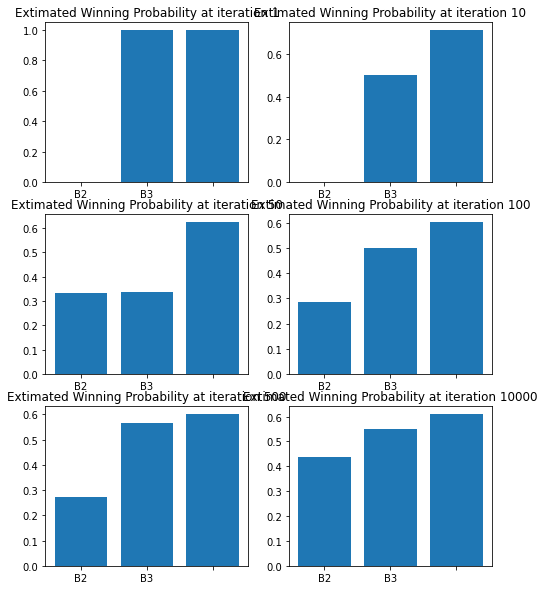

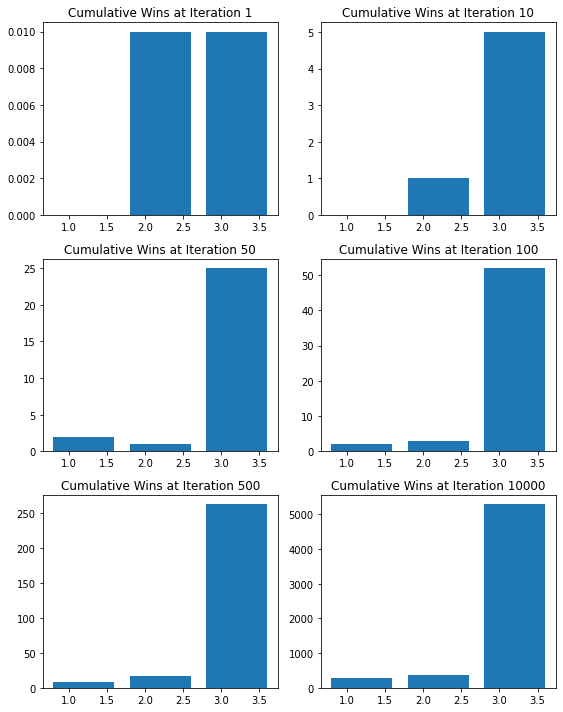

In [ ]:

# Run the trail for `n` iteration
def run_simulation(n_iterations, iterations_to_plot, epsilon=0.2):

    # Setup plot
    fig1, axs1 = plt.subplots(3, 2, figsize=(8, 10))
    fig2, axs2 = plt.subplots(3, 2, figsize=(8, 10))
    axs1 = axs1.flat
    axs2 = axs2.flat

    # The number of trials and wins will represent the prior for each
    #  bandit with the help of the Beta distribution.
    trials = [0, 0.01, 0.01]  # Number of times we tried each bandit
    wins = [0, 0.01, 0.01]  # Number of wins for each bandit
    
    for iteration in range(1, n_iterations+1):
        # Define the prior based on current observations
        try:
            results = [w/t for w,t in zip(wins, trials)]
        except ZeroDivisionError as e:
            # If we don't have any trials we just put 0 
            results = [w/t if t else 0 for w,t in zip(wins, trials)]
        if iteration in iterations_to_plot:
            ax1 = next(axs1)
            ax1.set_xticklabels(('B1', 'B2', 'B3'))
            ax1.bar([1, 2, 3], results)
            ax1.set_title(f'Extimated Winning Probability at iteration {iteration:d}')
            ax2 = next(axs2)
            ax2.bar([1.2, 2.2, 3.2], wins)
#             ax2.set_ylabel('Cumulative wins', color='r')
            ax2.set_title(f'Cumulative Wins at Iteration {iteration:d}')

        # Use epsilon greedy to choose a bandit
        chosen_bandit = epsilon_greedy(results, epsilon)
        # Pull the bandit
        x = pull(chosen_bandit)
        # Update trials and wins (defines the posterior)
        trials[chosen_bandit] += 1
        wins[chosen_bandit] += x

    plt.tight_layout()
    plt.show()
    
    
run_simulation(n_iterations=10000, iterations_to_plot=iterations_to_plot)  